## Data source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw<br>

In [46]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Load data

In [47]:
df = pd.read_excel("audi.xlsx")
display(df.head())


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


### EDA using groupby  based on model

In [48]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg.head())

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015


### Data preprocessing before visualization

In [49]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# remove the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


### Questions in mind: Based on model, transmission and fuelType,
     Top 5 selling car models in the dataset
     The average selling price of the top 5 selling car models
     The total sale of the top 5 selling car models

In [50]:
df.sort_values(by='price', ascending = False).head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145,21.1,5.2,audi
2255,R8,2020,137995,Semi-Auto,70,Petrol,145,21.1,5.2,audi
4179,R8,2019,137500,Semi-Auto,10,Petrol,150,21.4,5.2,audi
3367,R8,2019,135000,Automatic,1000,Petrol,145,32.8,5.2,audi
5459,R8,2020,133900,Semi-Auto,333,Petrol,145,21.4,5.2,audi


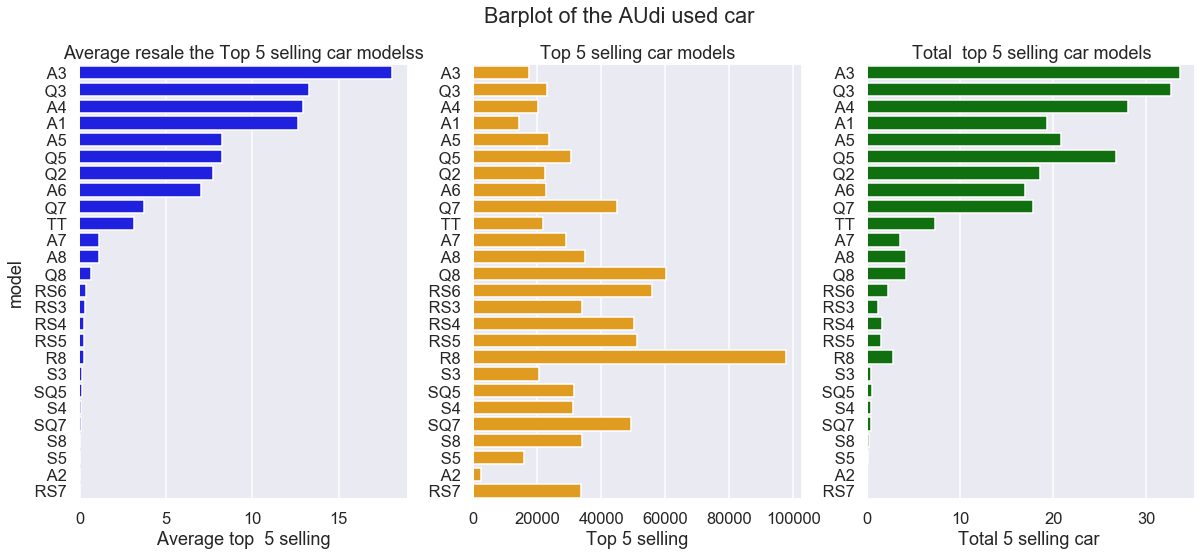

In [51]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Average resale the Top 5 selling car modelss")
plt.xlabel(" Average top  5 selling ")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Top 5 selling car models")
plt.xlabel("Top 5 selling")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Total  top 5 selling car models")
plt.xlabel("Total 5 selling car ")
plt.ylabel("")

plt.suptitle("Barplot of the AUdi used car")

plt.show()


### pivot_table and barplot

In [52]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot.head())

,count,mean,sum
,price,price,price
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
